In [1]:
#1.3.3 예제 : 인구에 따른 살인 비율의 위치 추정

In [2]:
import os
os.chdir('C:\\Users\\Gargantua\\Desktop\\data_analysis\\Project7_Practical_Statistics_for_Data_Scientists\\data')

In [3]:
import pandas as pd

state = pd.read_csv('state.csv')

In [12]:
state.head()

,State,Population,Murder.Rate,Abbreviation
0,Alabama,4779736,5.7,AL
1,Alaska,710231,5.6,AK
2,Arizona,6392017,4.7,AZ
3,Arkansas,2915918,5.6,AR
4,California,37253956,4.4,CA


In [18]:
#평균

state.Population.mean()
state['Population'].mean()

6162876.3

In [34]:
#절사평균

!pip install scipy

You should consider upgrading via the 'c:\users\gargantua\anaconda3\python.exe -m pip install --upgrade pip' command.


In [35]:
from scipy import stats

In [37]:
stats.trim_mean(state.Population, 0.1)

C:\Users\Gargantua\Anaconda3\lib\site-packages\scipy\stats\stats.py:2831: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.mean(atmp[sl], axis=axis)


4783697.125

In [38]:
#중위값

state.Population.median()

4436369.5

In [54]:
#가중평균

import numpy as np

np.average(state['Murder.Rate'], weights=state.Population)

4.445833981123393

In [55]:
#가중중위값

!pip install wquantiles

You should consider upgrading via the 'c:\users\gargantua\anaconda3\python.exe -m pip install --upgrade pip' command.


In [58]:
import wquantiles

wquantiles.median(state['Murder.Rate'], weights = state.Population)

4.4

In [1]:
#1.4.3 예제 : 주별 인구의 변이 추정

In [6]:
#표준편차

state.Population.std()
state[['Population']].std()

Population    6.848235e+06
dtype: float64

In [7]:
#사분위범위(IQR)

state.Population.quantile(0.75)-state.Population.quantile(0.25)

4847308.0

In [15]:
#중위절대편차(MAD)

! pip install statsmodels

You should consider upgrading via the 'c:\users\gargantua\anaconda3\python.exe -m pip install --upgrade pip' command.


In [25]:
from statsmodels import robust

robust.scale.mad(state[['Population']])

array([3849876.14599793])

In [26]:
#1.5.1 백분위수와 상자그림

In [29]:
state['Murder.Rate'].quantile([0.05, 0.25, 0.5, 0.75, 0.95])

0.05    1.600
0.25    2.425
0.50    4.000
0.75    5.550
0.95    6.510
Name: Murder.Rate, dtype: float64

Text(0,0.5,'Population (millions)')

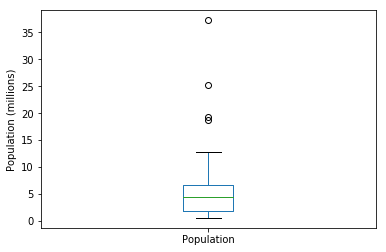

In [31]:
import pandas as pd

ax = (state.Population/1_000_000).plot.box()
ax.set_ylabel('Population (millions)')

In [37]:
#1.5.2 도수분포표와 히스토그램

In [38]:
#도수분포표


binnedPopulation = pd.cut(state.Population, 10)
binnedPopulation.value_counts()

(526935.67, 4232659.0]      24
(4232659.0, 7901692.0]      14
(7901692.0, 11570725.0]      6
(11570725.0, 15239758.0]     2
(33584923.0, 37253956.0]     1
(22577824.0, 26246857.0]     1
(18908791.0, 22577824.0]     1
(15239758.0, 18908791.0]     1
(29915890.0, 33584923.0]     0
(26246857.0, 29915890.0]     0
Name: Population, dtype: int64

Text(0.5,0,'Population (millions)')

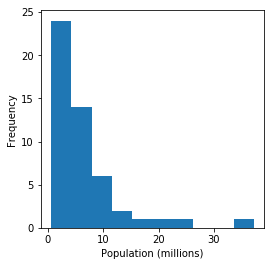

In [40]:
#히스토그램

ax = (state.Population / 1_000_000).plot.hist(figsize=(4,4))
ax.set_xlabel('Population (millions)')

In [1]:
#1.5.3 밀도그림과 추정

##밀도그림은 좀 더 부드러운 히스토그램 형태

###히스토그램과 가장 큰 차이는 y축 값. 선이 가리키는 y값은 개수가 아닌 '비율'이다.

Text(0.5,0,'Murder Rate (per 100,000)')

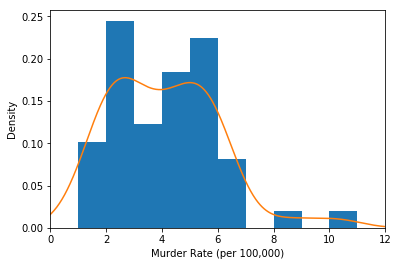

In [5]:
ax = state['Murder.Rate'].plot.hist(density=True, xlim=[0,12], bins=range(1,12))
state['Murder.Rate'].plot.density(ax=ax)
ax.set_xlabel('Murder Rate (per 100,000)')

In [7]:
#1.6 이진 데이터와 범주 데이터 탐색하기

##막대 도표는 범주형자료를 표현. : x축위에 범주 / y축 위에 횟수나 비율.

### 히스토그램에서 막대들은 붙어있고, 떨어져있으면 해당하는 계급에 대한 빈도가 없다는 것을 의미 vs 막대도표에서는 애초에 사이 간격이 떨어져있다.

#### 막대도표 대신 파이그림을 사용하기도 하지만 데이터 시각화 전문가들은 파이그림이 시각적으로 효과적이지 않다고 함.

##### 수치형데이터를 이와같이 범주화하는 것은 데이터의 복잡도와 크기를 줄여주며, 피처들 사이의 관계를 볼 수 있게 한다.

In [9]:
dfw = pd.read_csv("dfw_airline.csv")

Text(0,0.5,'Count')

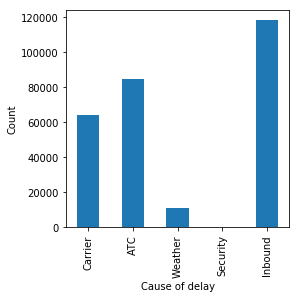

In [11]:
ax = dfw.transpose().plot.bar(figsize=(4,4), legend=False)
ax.set_xlabel("Cause of delay")
ax.set_ylabel("Count")

In [12]:
#1.7 상관관계

In [31]:
import pandas as pd

sp500_px = pd.read_csv("sp500_px.csv.", index_col = 0)
    ## index_col = 0 를 통해 row_name값으로 첫 칼럼이 들어가게 한다.
print(sp500_px.head())

sp500_sym = pd.read_csv("sp500_sectors.csv")
print(sp500_sym.head())

            ADS        CA      MSFT  RHT  CTSH       CSC       EMC       IBM  \
1993-01-29  0.0  0.060124 -0.022100  0.0   0.0  0.018897  0.007368  0.092165   
1993-02-01  0.0 -0.180389  0.027621  0.0   0.0  0.018889  0.018425  0.115207   
1993-02-02  0.0 -0.120257  0.035900  0.0   0.0 -0.075573  0.029482 -0.023041   
1993-02-03  0.0  0.060124 -0.024857  0.0   0.0 -0.151128  0.003689 -0.253454   
1993-02-04  0.0 -0.360770 -0.060757  0.0   0.0  0.113350 -0.022114  0.069862   

                 XRX      ALTR  ...   WAT  ALXN     AMGN  BXLT     BIIB  \
1993-01-29  0.259140 -0.007105  ...   0.0   0.0  0.34716   0.0  0.04167   
1993-02-01 -0.100775  0.063893  ...   0.0   0.0 -0.23144   0.0  0.00000   
1993-02-02  0.028796 -0.014192  ...   0.0   0.0 -0.11572   0.0  0.00000   
1993-02-03 -0.043190 -0.007105  ...   0.0   0.0 -0.08679   0.0  0.04167   
1993-02-04  0.000000 -0.007096  ...   0.0   0.0  0.14465   0.0 -0.04166   

               CELG      GILD  REGN    VRTX  HSIC  
1993-01-29  0.00

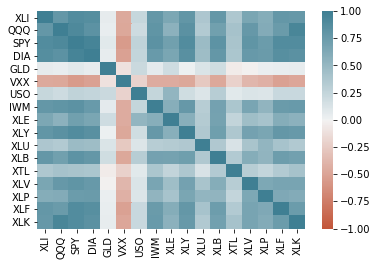

In [47]:
import seaborn as sns

etfs = sp500_px.loc[sp500_px.index > "2012-07-01",
                   sp500_sym[sp500_sym['sector']=="etf"]["symbol"]]
  ##row는 날짜 : 2012-07-01 이후 날짜 / col은 섹터가 etf인 것의 티커들에 대해 sp500_px의 주가 값 슬라이싱
    
sns.heatmap(etfs.corr(), vmin = -1, vmax = 1,
           cmap = sns.diverging_palette(20, 220, as_cmap = True))

In [2]:
#1.7.1 산점도

In [3]:
#두 변수의 관계를 시각화하는 가장 기본적인 방법.

In [8]:
import pandas as pd

sp500_px = pd.read_csv("sp500_data.csv.gz", index_col = 0)
sp500_sym = pd.read_csv("sp500_sectors.csv")

In [9]:
sp500_sym.head()

,sector,sector_label,sub_sector,symbol
0,information_technology,Technology,data_processing_&_outsourced_services,ADS
1,information_technology,Technology,systems_software,CA
2,information_technology,Technology,systems_software,MSFT
3,information_technology,Technology,systems_software,RHT
4,information_technology,Technology,it_consulting_&_services,CTSH


In [24]:
telecom = sp500_px[sp500_sym[sp500_sym['sector_label']=='Telecom']['symbol']]

In [25]:
telecom.head()

,T,CTL,FTR,VZ,LVLT
1993-01-29,-0.216268,-0.463919,0.000000,-0.064076,0.0
1993-02-01,0.096119,0.173973,0.014497,0.149513,0.0
1993-02-02,0.072089,0.086986,0.028998,0.085437,0.0
1993-02-03,0.000000,0.000000,-0.028997,0.106797,0.0
1993-02-04,-0.048059,0.289952,0.028998,-0.106792,0.0


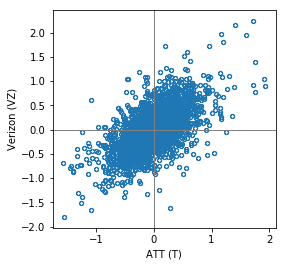

In [27]:
ax = telecom.plot.scatter(x='T', y='VZ', figsize = (4,4), marker='$\u25EF$')
ax.set_xlabel('ATT (T)')
ax.set_ylabel('Verizon (VZ)')
ax.axhline(0, color='grey', lw=1)
ax.axvline(0, color='grey', lw=1)

In [28]:
#1.8 두 개 이상의 변수 탐색하기

## 데이터 특성에 따라 분석 형태가 달라진다. (수치형 / 범주형)

In [29]:
#1.8.1 육각형 구간과 등고선

## 수십 수백만의 레코드를 산점도로 나타내기는 어려움. -> 육각형 구간과 등고선 활용

In [61]:
#데이터 슬라이싱

kc_tax = pd.read_csv("kc_tax.csv.gz")

kc_tax0 = kc_tax[(kc_tax.TaxAssessedValue < 750000) &
                (kc_tax.SqFtTotLiving >100) &
                (kc_tax.SqFtTotLiving <3500)]

In [62]:
kc_tax0.head()
kc_tax0.shape

(432693, 3)

Text(0,0.5,'Tax-Assessed Value')

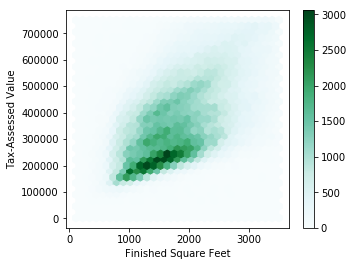

In [65]:
# 수치형 - 수치형 데이터 분석1(육각형 구간 그래프 그리기)
## 수십 수백만의 레코드를 산점도로 나타내기는 어려움. -> 육각형 구간과 등고선 활용


ax = kc_tax0.plot.hexbin(x='SqFtTotLiving', y='TaxAssessedValue',
                        gridsize=30, sharex=False, figsize=(5,4))
ax.set_xlabel('Finished Square Feet')
ax.set_ylabel('Tax-Assessed Value')

In [66]:
# 수치형 - 수치형 데이터 분석2(등고선 그래프 그리기)

Text(0,0.5,'Tax-Assessed Value')

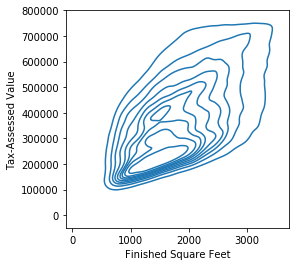

In [71]:
import seaborn as sns
import matplotlib.pylab as plt

fig, ax = plt.subplots(figsize=(4,4))
ax = sns.kdeplot(data=kc_tax0, x='SqFtTotLiving', y='TaxAssessedValue', ax=ax)
ax.set_xlabel('Finished Square Feet')
ax.set_ylabel('Tax-Assessed Value')

In [1]:
#1.8.2 범주형 변수 대 범주형 변수

In [ ]:
## 두 범주형 변수의 요약에는 <분할표>를 사용하여 범주별 빈도수를 기록한다.

In [4]:
import pandas as pd

In [6]:
lc_loans = pd.read_csv("lc_loans.csv")

In [20]:
crosstab = lc_loans.pivot_table(index = "grade", columns = "status",
                               aggfunc = lambda x : len(x), margins = True)
#margin 값을 통하여 열과 행의 합계를 추가할 수 있다.(True 값을 통해 All 행/열을 추가 가능)
crosstab

status,Charged Off,Current,Fully Paid,Late,All
grade,,,,,
A,1562,50051,20408,469,72490
B,5302,93852,31160,2056,132370
C,6023,88928,23147,2777,120875
D,5007,53281,13681,2308,74277
E,2842,24639,5949,1374,34804
F,1526,8444,2328,606,12904
G,409,1990,643,199,3241
All,22671,321185,97316,9789,450961


In [13]:
df = crosstab.loc['A':'G', :].copy()
#열 합계를 무시하고 피벗 테이블의 복사본을 만든다.

In [15]:
df.loc[:,'Charged Off':'Late'] = df.loc[:, 'Charged Off':'Late'].div(df['All'], axis = 0)
# 행 합계로 행을 나눈다.
## 파이썬은 특정 행/열을 지칭하기 위해 loc를 붙인다.(:만 쓰는 것은 모든 행/열을 지칭)
### []안에 조건문을 넣어 슬라이싱할 수도 있다.

In [16]:
df['All'] = df['All'] / sum(df['All'])
#All 열을 총 합으로 나눈다.

In [17]:
perc_crosstab = df

In [18]:
df

status,Charged Off,Current,Fully Paid,Late,All
grade,,,,,
A,0.021548,0.690454,0.281528,0.006470,0.160746
B,0.040054,0.709013,0.235401,0.015532,0.293529
C,0.049828,0.735702,0.191495,0.022974,0.268039
D,0.067410,0.717328,0.184189,0.031073,0.164708
E,0.081657,0.707936,0.170929,0.039478,0.077177
F,0.118258,0.654371,0.180409,0.046962,0.028614
G,0.126196,0.614008,0.198396,0.061401,0.007187


In [26]:
#1.8.3 범주형 번수 대 수치형 번수

In [ ]:
#박스플롯 도표 그리기

In [27]:
airline_stats = pd.read_csv("airline_stats.csv")

In [28]:
airline_stats.head()

,pct_carrier_delay,pct_atc_delay,pct_weather_delay,airline
0,8.153226,1.971774,0.762097,American
1,5.959924,3.706107,1.585878,American
2,7.157270,2.706231,2.026706,American
3,12.100000,11.033333,0.000000,American
4,7.333333,3.365591,1.774194,American


C:\Users\Gargantua\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Text(0.5,0.98,'')

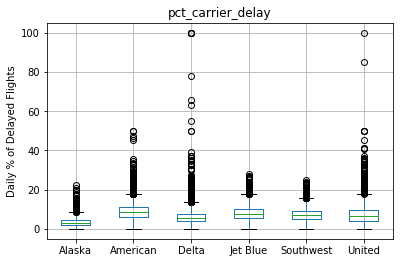

In [30]:
import matplotlib.pylab as plt

ax = airline_stats.boxplot(by='airline', column='pct_carrier_delay')
ax.set_xlabel('')
ax.set_ylabel('Daily % of Delayed Flights')
plt.suptitle('')

In [31]:
#바이올린 도표 그리기

##박스플롯에서는 보이지 않는 값을 볼 수 있다 : alsaka / Delta / United 항공사가 상대적으로 0 값의 비중이 큼을 알 수 있다.

C:\Users\Gargantua\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0,0.5,'Daily % of Delayed Flights')

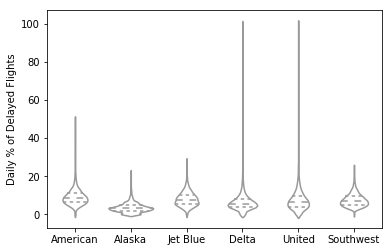

In [34]:
import seaborn as sns

ax = sns.violinplot(airline_stats.airline, airline_stats.pct_carrier_delay,
                   inner = 'quartile', color = 'white')
ax.set_xlabel('')
ax.set_ylabel('Daily % of Delayed Flights')

In [35]:
#1.8.4 다변수 시각화하기

In [36]:
## 다변량 분석은 <조건화(conditioning)> 개념을 통해이변량 분석 툴을 좀 더 고차원화 하여 살펴볼 수 있다.

In [37]:
kc_tax = pd.read_csv("kc_tax.csv.gz")

kc_tax0 = kc_tax[(kc_tax.TaxAssessedValue < 750000) &
                (kc_tax.SqFtTotLiving >100) &
                (kc_tax.SqFtTotLiving <3500)]

In [39]:
zip_codes = [98188, 98105, 98108, 98126]
kc_tax_zip = kc_tax0.loc[kc_tax0.ZipCode.isin(zip_codes),:]
kc_tax_zip.head()

,TaxAssessedValue,SqFtTotLiving,ZipCode
3,361000.0,2000,98108.0
4,459000.0,3150,98108.0
10,202000.0,830,98108.0
11,210000.0,1130,98108.0
12,193000.0,1560,98108.0


ValueError: Invalid format specifier

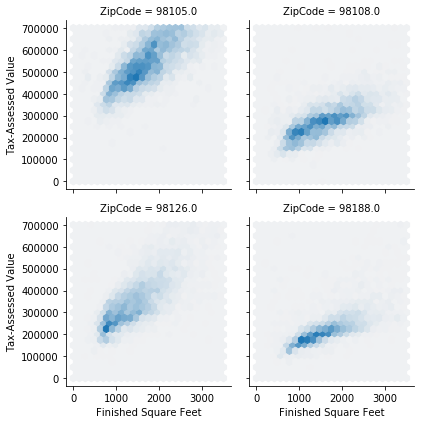

In [40]:
import seaborn as sns

def hexbin(x, y, color, **kwargs):
    cmap = sns.light_palette(color, as_cmap=True)
    plt.hexbin(x, y, gridsize=25, cmap=cmap, **kwargs)

g = sns.FacetGrid(kc_tax_zip, col = 'ZipCode', col_wrap = 2)
#조건 변수를 지정하려면 col / row 인수를 사용함. 단일 조건 변수의 경우 col_wrap과 함께 col을 사용하여 패싯 그래프를 여러 행으로 래핑한다.

g.map(hexbin, 'SqFtTotLiving', 'TaxAssessedValue',
     extent = [0, 3500, 0, 700000])
#map 메서드는 다른 우편번호에 대한 원래 데이터 집합의 서브셋에 대해 hexbin 함수를 호출한다.
#extent는 x축과 y축의 한계를 정의한다.

g.set_axis_labels('Finished Square Feet', 'Tax-Assessed Value')
g.set_titles('Zip code {col_name:,0f}')
